# Decorator for time-lapse processing

This notebook shows how to use the `frame_by_frame` function to process timelapse data of points and surfaces for functions in- or outside the `napari-stress` plugin.

In [6]:
import vedo
import napari_stress
import napari_process_points_and_surfaces as nppas
import numpy as np

import napari

First, we need some synthetic data. For this, we create a list of spheres and add some noise to the vertex positions.

In [2]:
spheres = [[vedo.shapes.Sphere().points(), np.asarray(vedo.shapes.Sphere().faces())] for k in range(10)]

In [3]:
for sphere in spheres:
    sphere[0] += np.random.normal(scale=0.01, size = spheres[0][0].shape)

As it is, this object cannot be added to Napari. To make it Napari-compliant, we have to convert the list with the frames into a single object. the `Converter` class allows to do this:

In [4]:
Converter = napari_stress.TimelapseConverter()
spheres_data = Converter.list_of_data_to_data(spheres, layertype=napari.types.SurfaceData)

Assistant skips harvesting pyclesperanto as it's not installed.


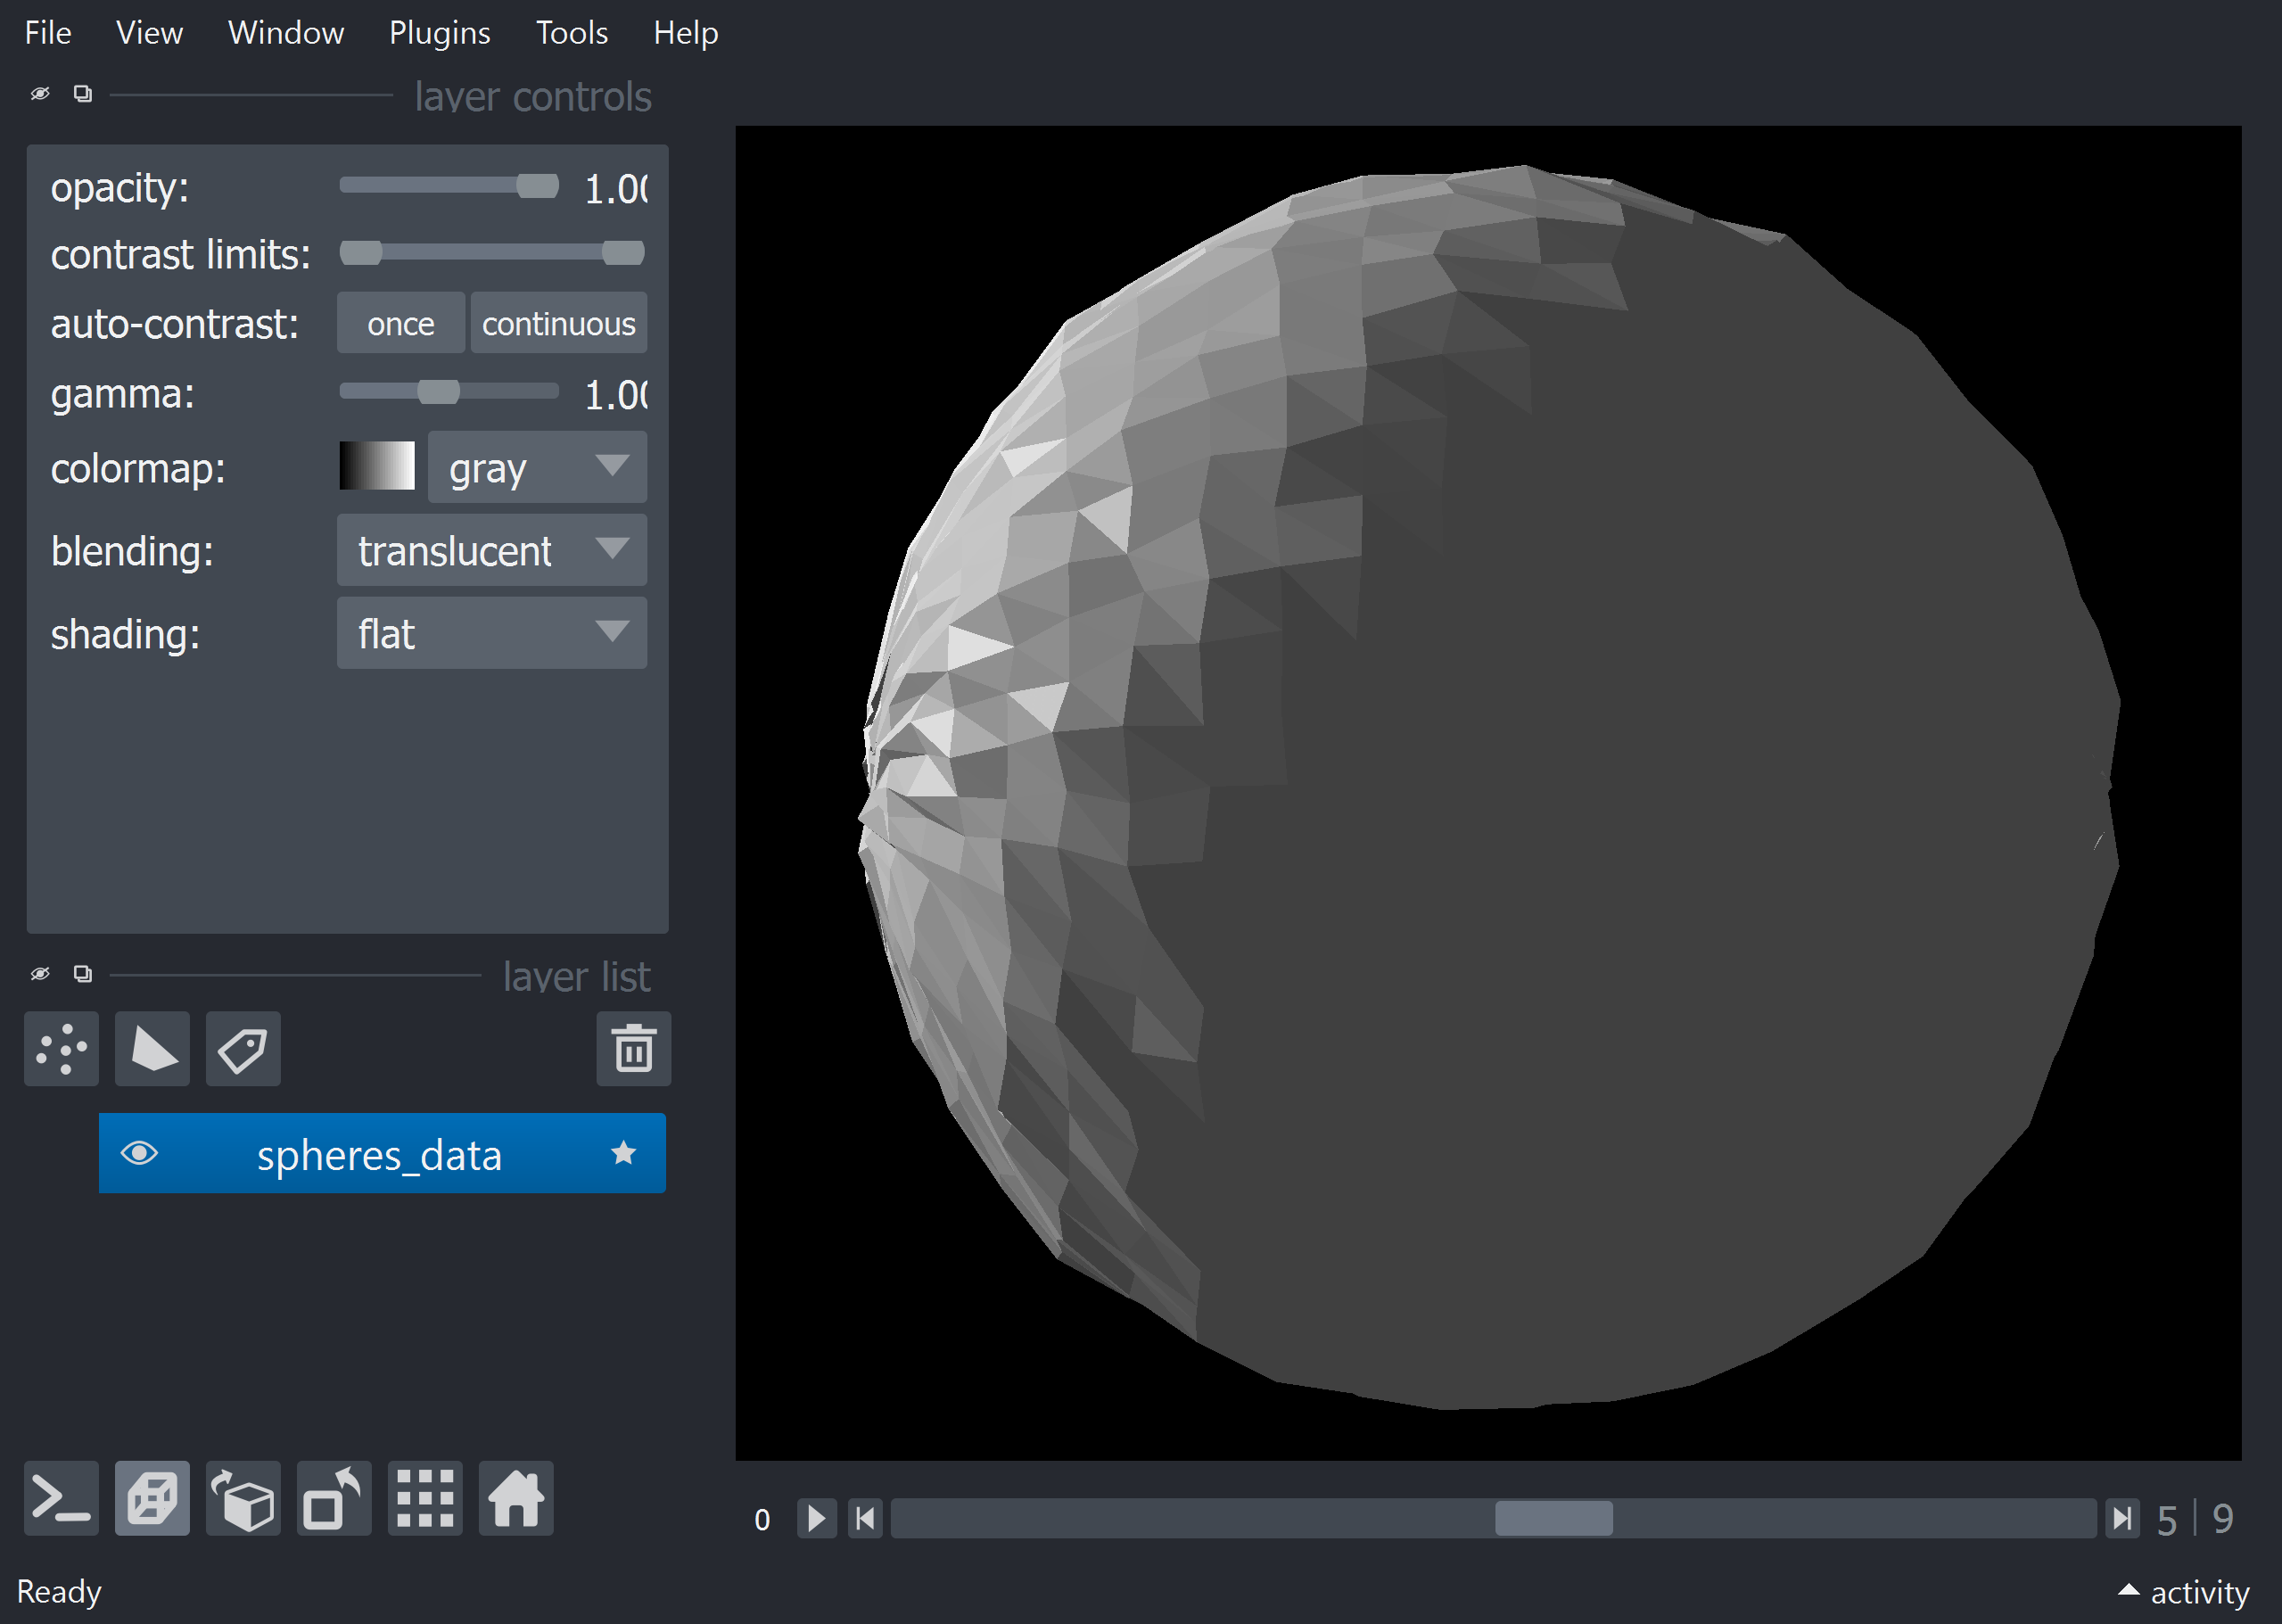

In [5]:
viewer = napari.Viewer(ndisplay=3)
viewer.add_surface(spheres_data)

napari.utils.nbscreenshot(viewer)

## Apply functions to timelapse data

Surface/Points data can be processed either by adding the `frame_by_frame` decorator to the function in your own code or by wrapping it around functions from other repositories. In order to smooth the sphere we created, we could use the `filter_smooth_simple` function from [napari-process-points-and-surfaces](https://github.com/haesleinhuepf/napari-process-points-and-surfaces):

In [7]:
napari_stress.frame_by_frame(nppas.filter_smooth_simple)(spheres)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.